In [1]:
from pyprojroot import here

workspace_path = str(here())
%cd $workspace_path
print(f"Working Directory has been set to `{workspace_path}`")

from os import path
import autolens as al
import autolens.plot as aplt
import autofit as af 

/home/carlos/autolens_workspace
Working Directory has been set to `/home/carlos/autolens_workspace`


In [9]:
dataset_path = "/home/carlos/autolens_workspace/SDP81/Data/"

In [10]:
imaging = al.Imaging.from_fits(
    image_path=path.join(dataset_path, "ALMA_resampled.fits"),
    noise_map_path=path.join(dataset_path, "ALMA_rms_noise_map.fits"),
    psf_path=path.join(dataset_path, "alma_psf.fits"),
    pixel_scales=0.01,
    image_hdu=1, noise_map_hdu=1
)

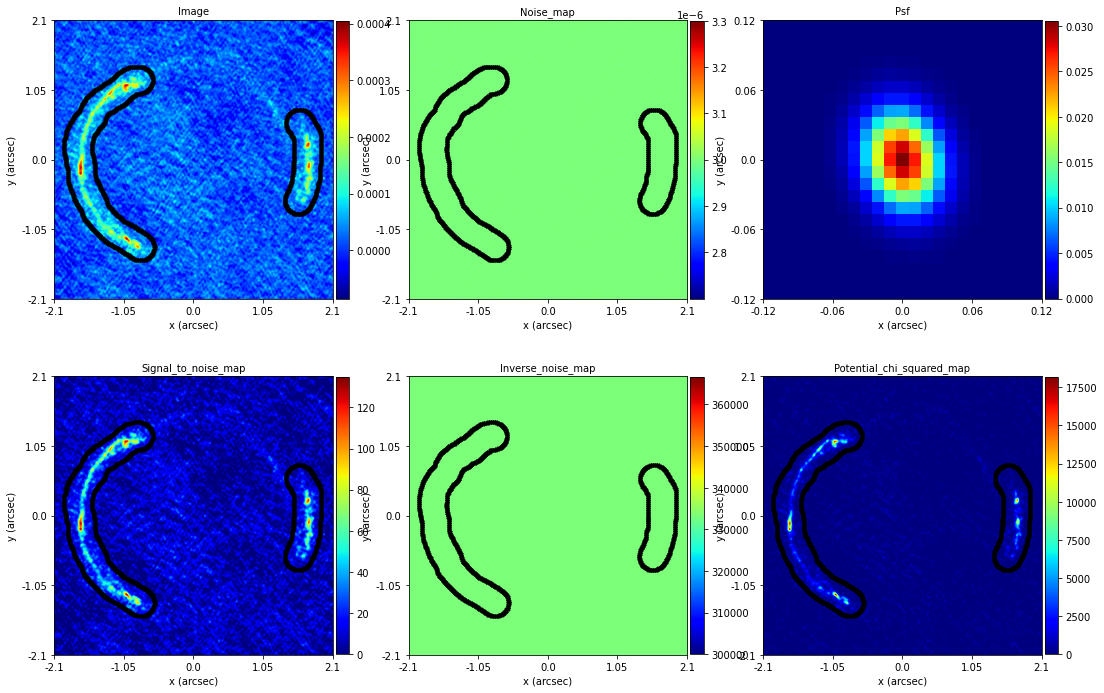

In [11]:
#Load mask

mask_custom = al.Mask.from_fits(
    file_path=f"{dataset_path}mask_gui.fits", hdu=0, pixel_scales=imaging.pixel_scales
)

masked_imaging = al.MaskedImaging(imaging=imaging, mask=mask_custom)

aplt.Imaging.subplot_imaging(imaging=imaging, mask=mask_custom)

In [36]:
elliptical_comps_mass = al.convert.elliptical_comps_from(axis_ratio=1.25, phi=13)
elliptical_comps_shear = al.convert.shear_elliptical_comps_from(magnitude=0.04, phi=-4)

mass_profile = al.mp.EllipticalPowerLaw(centre=(0.0, 0.0), elliptical_comps= elliptical_comps_mass ,
                                einstein_radius=1.25, slope=2.01)

In [37]:
lens_galaxy = al.Galaxy(redshift=0.299,
                        mass=mass_profile,
                        shear=al.mp.ExternalShear(elliptical_comps=elliptical_comps_shear))

In [38]:
source_galaxy = al.Galaxy(
     redshift=3.042,
    pixelization=al.pix.Rectangular(shape=(40,40)),
   regularization=al.reg.Constant(coefficient=3.5),
        )

In [39]:
masked_imaging = al.MaskedImaging(
        imaging=imaging, mask=mask,
     )

In [40]:
tracer = al.Tracer.from_galaxies(galaxies=[lens_galaxy, source_galaxy])

In [41]:
fit = al.FitImaging(masked_imaging=masked_imaging, tracer=tracer)

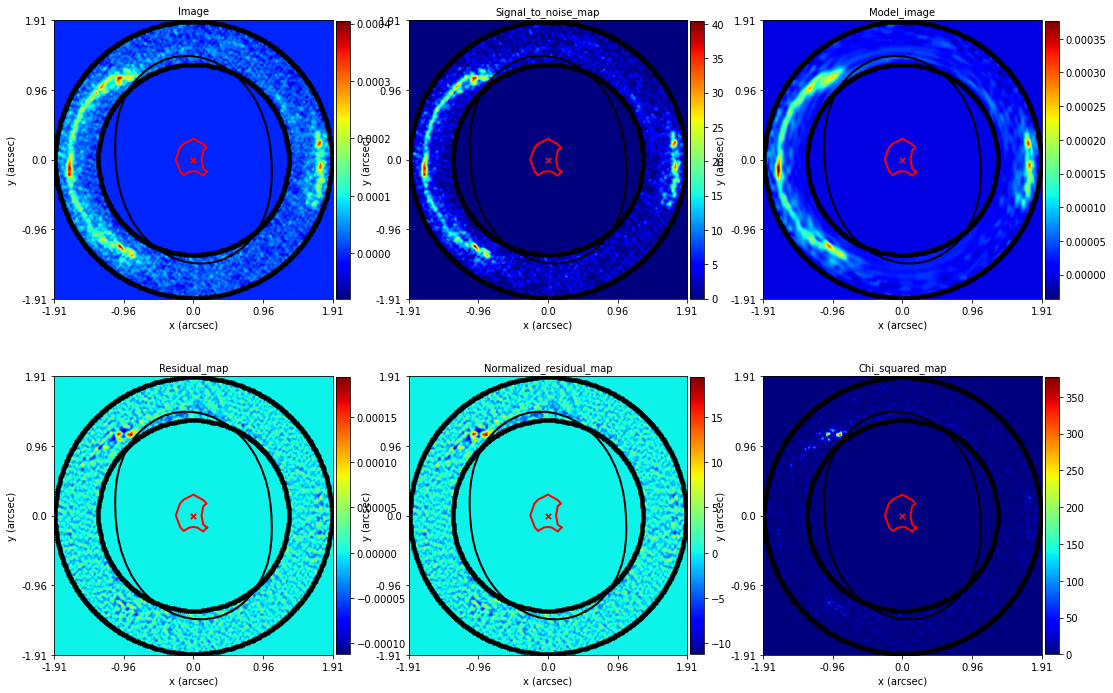

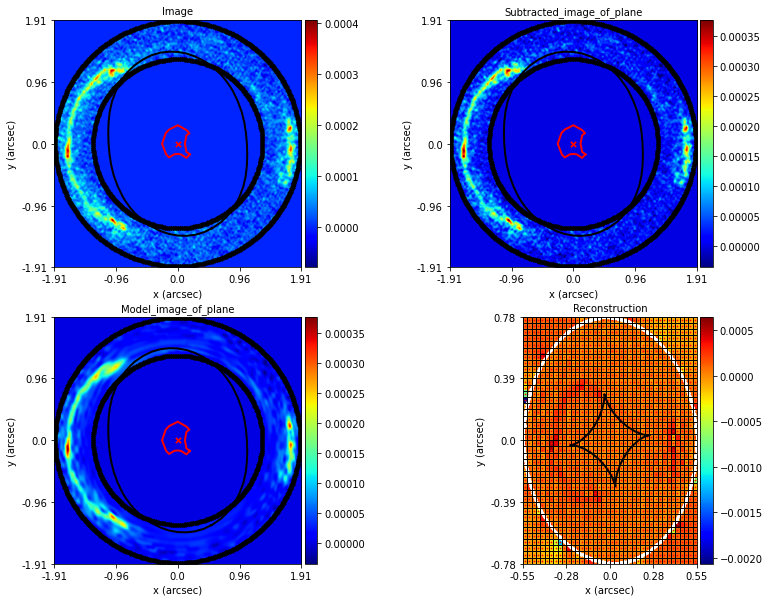

In [42]:
aplt.FitImaging.subplot_fit_imaging(fit=fit, include=aplt.Include(mask=True))
aplt.FitImaging.subplot_of_plane(
    fit=fit, plane_index=1, include=aplt.Include(mask=True)
)